In [2]:
import os
import wget
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflowjs as tfjs

In [3]:
# Download the dataset from the provided URL using wget
# !wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

wget.download('https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip', '../data/cats_and_dogs_filtered.zip')

'cats_and_dogs_filtered.zip'

In [4]:
# Extract the dataset to the specified directory
cats_dogs_zip = '../data/cats_and_dogs_filtered.zip'
zip_ref   = zipfile.ZipFile(cats_dogs_zip, 'r')
zip_ref.extractall('../data/')
zip_ref.close()

In [5]:
# Define the directory paths for training and validation data
TRAINING_DIR = os.path.join(DATA_DIR, "cats_and_dogs_filtered/train/")
VALIDATION_DIR = os.path.join(DATA_DIR, "cats_and_dogs_filtered/validation/")

# Subdirectories for cats and dogs in training and validation sets
TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

In [6]:
# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

There are 1000 images of cats for training
There are 1000 images of dogs for training
There are 500 images of cats for validation
There are 500 images of dogs for validation


In [7]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  
  # Instantiate the ImageDataGenerator class for data augmentation (training set)
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Generate batches of image data from the training directory
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class for validation set
  validation_datagen = ImageDataGenerator(rescale=1./255.)

  # Generate batches of image data from the validation directory
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode='binary',
                                                                target_size=(150, 150))

  return train_generator, validation_generator

In [8]:
# Test the train and validation data generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
def create_model():
  # Define the Sequential model with convolutional and dense layers
  model = tf.keras.models.Sequential([
    # First convolutional layer with 16 filters, kernel size (3x3), ReLU activation, and input shape
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    
    # Fully connected dense layer with 512 neurons and ReLU activation
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Output layer with 1 neuron and sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [10]:
model = create_model()

# Train the model with the training and validation data generators
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - accuracy: 0.4858 - loss: 0.8424 - val_accuracy: 0.5300 - val_loss: 0.6829
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 340ms/step - accuracy: 0.5601 - loss: 0.6853 - val_accuracy: 0.5250 - val_loss: 0.6884
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step - accuracy: 0.5288 - loss: 0.6872 - val_accuracy: 0.5740 - val_loss: 0.6704
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 305ms/step - accuracy: 0.5997 - loss: 0.6740 - val_accuracy: 0.5530 - val_loss: 0.6660
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.6133 - loss: 0.6535 - val_accuracy: 0.6270 - val_loss: 0.6326
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - accuracy: 0.6196 - loss: 0.6562 - val_accuracy: 0.6230 - val_loss: 0.6667
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.6358 - loss: 0.6339 - val_accuracy: 0.6490 - val_loss: 0.6283
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - accuracy: 0.6420 - loss: 0.6317 - val_accuracy: 0.699

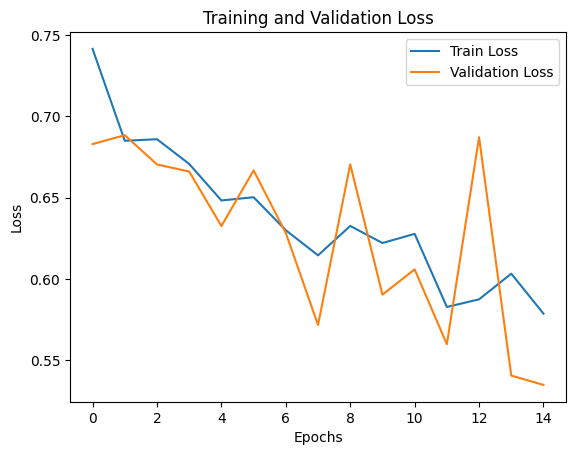

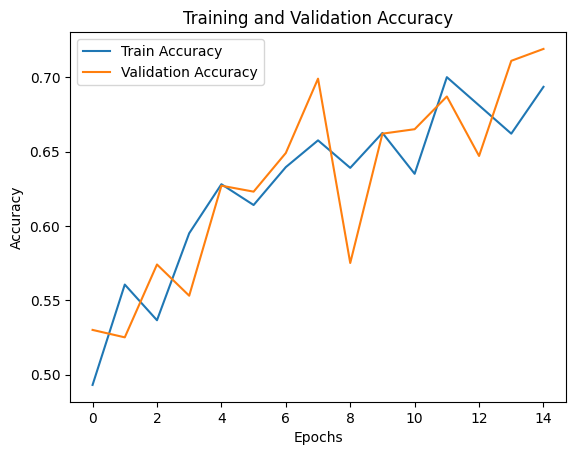

In [11]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [18]:
import keras

# 1. Save as .h5
keras.saving.save_model(model, 'model.h5')

# 2. Save as .keras
keras.saving.save_model(model, 'model.keras')

# 3. Save as SavedModel
tf.saved_model.save(model, 'saved_model/')

# 4. Save model in TensorFlow.js format
tfjs.converters.save_keras_model(model, 'tfjs_model')

# 5. Save as .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

failed to lookup keras version from the file,
    this is likely a weight only file
Saved artifact at '/tmp/tmpz3bkxm0k'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134790997171312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788241544064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788203620384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788203618800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788206835520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788203621264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788168809136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788168794704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788168806320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  